## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 6/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'toronto_cleaned.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'scrape_id', 'host_id', 'host_since',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable', 'listings_count',
       'listings_count_home', 'listings_count_p_rooms',
       'listings_count_s_rooms'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_since,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,listings_count,listings_count_home,listings_count_p_rooms,listings_count_s_rooms
0,2,26654,20240214201029,113345,2010-04-25,0,1,Waterfront Communities-The Island,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1.0,2.0,"[""Building staff"", ""Microwave"", ""Central air c...",164.0,28,1125,1,0,0,0,115,2024-02-15,42,2,0,f,5,5,0,0
1,6,27423,20240214201029,118124,2010-05-04,0,1,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Free street parking"", ""Microwave"", ""Central ...",75.0,90,365,1,10,13,13,146,2024-02-15,28,1,0,f,1,1,0,0
2,7,335446,20240214201029,1704172,2012-02-05,1,1,Moss Park,43.65744,-79.37228,Private room in condo,Private room,1,1.0,1.0,1.0,"[""Microwave"", ""Central air conditioning"", ""Fre...",100.0,28,1125,1,0,0,2,277,2024-02-15,121,1,0,t,2,1,1,0
3,9,339418,20240214201029,1027776,2011-08-27,0,1,Mount Pleasant West,43.69954,-79.39330,Private room in rental unit,Private room,2,1.0,1.0,0.0,"[""Free street parking"", ""Microwave"", ""Shared s...",60.0,28,90,1,0,0,0,0,2024-02-15,85,0,0,f,1,0,1,0
4,12,42892,20240214201029,187320,2010-08-01,1,1,Waterfront Communities-The Island,43.64450,-79.38019,Entire condo,Entire home/apt,4,2.0,3.0,3.0,"[""Lake access"", ""Long term stays allowed"", ""Ho...",140.0,30,365,1,29,59,89,364,2024-02-15,0,0,0,f,12,7,5,0


In [9]:
df.shape

(15235, 34)

##### Missing values

In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                0
id                        0
scrape_id                 0
host_id                   0
host_since                0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
calendar_last_scraped     0
number_of_reviews         0
number_of_reviews_ltm     0
number_of_reviews_l30d    0
instant_bookable          0
listings_count            0
listings_count_home       0
listings_count_p_rooms    0
listings_count_s_rooms    0
dtype: int64

As the data frame was already cleaned, we didn't find any missing values.

##### Duplicates check

In [15]:
dups = df.duplicated()

In [16]:
dups.shape # No dups

(15235,)

##### Extreme values checks

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


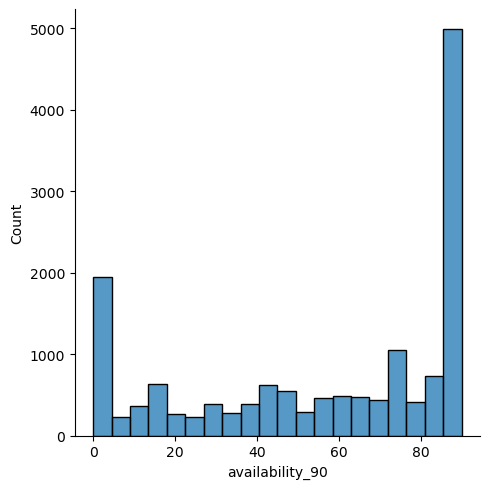

In [31]:
# No value should be higher than 90
sns.displot(df['availability_90'], bins=20) 

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


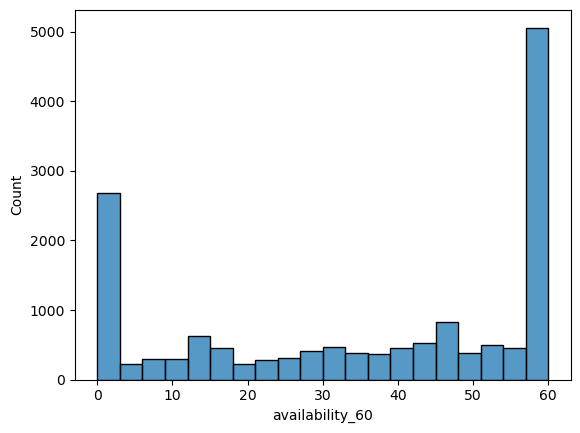

In [28]:
# No value should be higher than 90
sns.histplot(df['availability_60'], bins=20) 
plt.show()

There no extreme values in this case.

### 3. Data prep for regression analysis 

<Axes: xlabel='availability_60', ylabel='availability_90'>

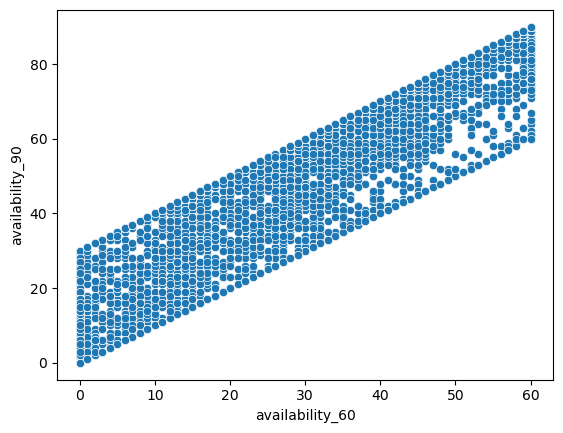

In [33]:
# Looking at the scatterplot for availability_60 and availability_90 variables
sns.scatterplot(x = 'availability_60', y = 'availability_90', data = df)

There seems to be a linear relationship between the two variables. We can form the following hypothesis:

**If a listing is available for higher number of times in the next sixty days, it will be available for higher number of days in the next 90 days.**

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['availability_60'].values.reshape(-1,1)
y = df['availability_90'].values.reshape(-1,1)

In [44]:
# Spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [45]:
# Creating a regression object.
regression = LinearRegression()  

In [46]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

##### Compare how the regression fits the training set

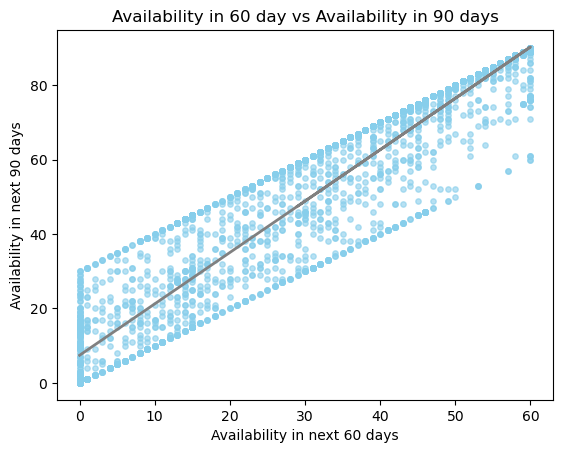

In [53]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='skyblue', s = 15, alpha =0.6)
plot_test.plot(X_test, y_predicted, color='grey', linewidth =2)
plot_test.title('Availability in 60 day vs Availability in 90 days')
plot_test.xlabel('Availability in next 60 days')
plot_test.ylabel('Availability in next 90 days')
plot_test.show()

The scatter plot itself shows a linear structure. The data is spread throughout and therefore for some of the predicted values will be off the mark. For instance, the predicted values when the avaialbility in the next 60 days is zero, there are number of values for the availability in next 90 days ranging from 0 to about 30 days. It naturally becomes difficult to select a single predicted value that represents availability in next 90 days. 

In [59]:
# mean squared error and R2 score
mse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [60]:
# Evaluating the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[1.38073278]]
Mean squared error:  70.78630333177198
R2 score:  0.9338455847230647


In [61]:
# Comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,59,47.471790
1,86,86.132308
2,83,80.609377
3,45,28.141531
4,25,7.430539
5,76,70.944247
6,90,90.274506
7,87,86.132308
8,74,68.182782
9,90,90.274506


Note:

1. From what I can understand, despite the fact that R^2 value is high (0.9338) there is too much variability in this data. Mean square error of 70.7863 is really high in my opinion. It means that the square error is 70.783! If we consider square root then it will be 8.4 days. That means our predictions could be off by about 8 days.
2. There is a chance of data bias in this analysis, as approximately 25% of the missing price observations out of 20,630 were removed. This could potentially skew the data in one direction or another, so the results of this analysis must be interpreted with caution.
